In [1]:
# Imports needed for the script
import numpy as np
import glob
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import tweepy
import json
import pydot
import graphviz

%matplotlib inline
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
from datetime import date

In [2]:
test = pd.read_csv (r'dataset.csv', encoding='latin-1')

In [3]:
test.shape

(52, 10)

In [4]:
test.head()

,user_id,user_name,screen_name,follower_count,description,verified,profile_image_default,protected,favourite_count,user_registration
0,68504932,DerechoUAntofagasta,DerechoAntof,741,1,0,0,0,741,24-08-2009
1,117199500,Boris Galvez,bagalvez,69,1,0,0,0,69,24-02-2010
2,574463393,Veronica Duberly Tabilo Muñoz,verotab47,4078,1,0,0,0,4078,08-05-2012
3,368773158,Rodrigo Piaggio Marchant,PiaggioMarchant,3569,1,0,0,0,3569,06-09-2011
4,1481723006,ALPU,lori3540,4299,1,0,0,0,4299,04-06-2013


In [5]:
test["user_id"]

0                68504932
1               117199500
2               574463393
3               368773158
4              1481723006
5     1199881155681640448
6     1251979976674619394
7               118735179
8     1211373950199984128
9      769206956871548928
10               92259558
11    1200422376871215104
12               67391751
13               64725192
14              335681384
15              121813315
16              740547474
17              206045556
18    1197247305885323266
19    1450455931486183429
20             2184876370
21     919997511489740801
22     832172037070286849
23               56266769
24              551353047
25              387319514
26    1388660914828763141
27    1380719981944569856
28              366923186
29              135375527
30    1147685269535186944
31              168253232
32              118817252
33    1360188051423715333
34             3244813019
35     884931206437011457
36              122090306
37              204930916
38          

In [6]:
test.sort_values(["user_registration"])

,user_id,user_name,screen_name,follower_count,description,verified,profile_image_default,protected,favourite_count,user_registration
7,118735179,Marcelo Tapia,marcelotapiao,215,1,0,0,0,215,01-03-2010
32,118817252,María José Beltrán Lo prado,Marytha85,449,1,0,0,0,449,01-03-2010
40,1454990758948360197,IsAgús ToYs,IsAgustoys,0,1,0,0,0,0,01-11-2021
47,542992924,Huichipirichi,sotchiltfemina,35,0,0,0,0,35,02-04-2012
26,1388660914828763141,@PabloCano,PabloCanoCura,531,1,0,0,0,531,02-05-2021
28,366923186,jose_Montaner,Jose_Montaner,1679,1,0,0,0,1679,03-09-2011
4,1481723006,ALPU,lori3540,4299,1,0,0,0,4299,04-06-2013
16,740547474,Bruno Cortes,twenty_wayne,142,1,0,0,0,142,06-08-2012
3,368773158,Rodrigo Piaggio Marchant,PiaggioMarchant,3569,1,0,0,0,3569,06-09-2011
38,331040088,Venezolanos en Chile,VnezuelaEnChile,93695,1,0,0,0,93695,07-07-2011


[68504932, 117199500, 574463393, 368773158, 1481723006, 1199881155681640448, 1251979976674619394, 118735179, 1211373950199984128, 769206956871548928, 92259558, 1200422376871215104, 67391751, 64725192, 335681384, 121813315, 740547474, 206045556, 1197247305885323266, 1450455931486183429, 2184876370, 919997511489740801, 832172037070286849, 56266769, 551353047, 387319514, 1388660914828763141, 1380719981944569856, 366923186, 135375527, 1147685269535186944, 168253232, 118817252, 1360188051423715333, 3244813019, 884931206437011457, 122090306, 204930916, 331040088, 613186204, 1454990758948360197, 2471476109, 85651206, 214173942, 255295724, 1186156123088441344, 4502865627, 542992924, 1203650084006703104, 2918033986, 61590292, 2198419465]


<BarContainer object of 38 artists>

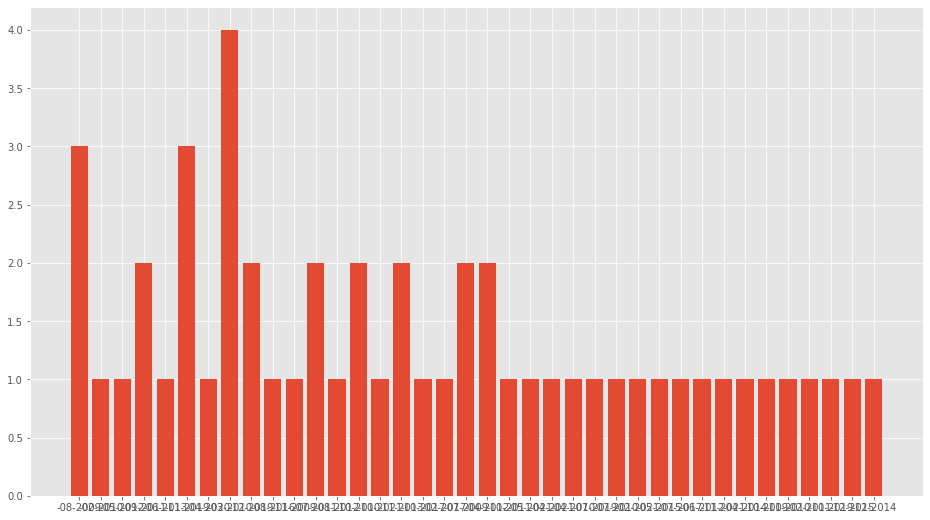

In [7]:
ocurrencies = {}
users = []
for index, row in test.iterrows():
    if (row['user_registration'][2:12] in ocurrencies and row['user_id'] not in users) :
        users.append(row['user_id'])
        ocurrencies[row['user_registration'][2:12]] += 1
    elif (row['user_registration'][2:12] in ocurrencies and row['user_id'] in users):
        continue
    else:
        users.append(row['user_id'])
        ocurrencies[row['user_registration'][2:12]] = 1
 
print(users)
plt.bar(ocurrencies.keys(), ocurrencies.values())

In [8]:
#Credenciales

API_KEY = 'xYLe5IZ7LdnWEgef8v1k0jqEt'
API_KEY_SECRET = 'z3cW3xLWIYP6OoLAxsOx4cpex5IjCr8InLWLt9WxlBbpvtTJq2'
ACCESS_TOKEN = '376338170-R3SPxz9gK1eks3TfekwnRcKmMfAfEnMDg3MN42n5'
ACCESS_TOKEN_SECRET = '0jGCULO47TTF6glVUO2Vxcax2kEqi5byk9ajeFg89EBct'

#Autenticación
auth = tweepy.OAuthHandler(API_KEY, API_KEY_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

api = tweepy.API(auth, wait_on_rate_limit = True)



#print(json.dumps(user._json,indent=2))

#print(user._json['protected'])

In [9]:
#Mapeo de Datos
most_used = ['user_id','user_name','screen_name', 'follower_count', 'description', 'verified', 'profile_image_default', 'protected', 'favourite_count','user_registration']
mappedUserName = []
mappedAge = []
error_id = []
for index, row in test.iterrows():
    
    try:
        name = ""
        for i in range (len(row['user_name'].lower().split())):
            name+=row['user_name'].lower().split()[i]
        
        if name in row['screen_name'].lower():
            mappedUserName.append(1)
        else:
            mappedUserName.append(0)
            
        age = abs(2021 - int(row['user_registration'][6:10]))
        mappedAge.append(age)

    except:
        print(row['user_id'])
        error_id.append(row['user_id'])
        continue

test['mappedAge'] = mappedAge        
test['mappedUserName'] = mappedUserName
test['mappedFollowerCount'] = test['follower_count']
test['mappedDescription'] = test['description']
test['mappedVerified'] = test['verified']
test['mappedDefaultImage'] = test['profile_image_default']
test['mappedProtected'] = test['protected']
test['mappedFavouriteCount'] = test['favourite_count']


In [13]:
users_encoded = test.drop(most_used, axis = 1)
users_encoded

,mappedAge,mappedUserName,mappedFollowerCount,mappedDescription,mappedVerified,mappedDefaultImage,mappedProtected,mappedFavouriteCount
0,12,0,741,1,0,0,0,741
1,11,0,69,1,0,0,0,69
2,9,0,4078,1,0,0,0,4078
3,10,0,3569,1,0,0,0,3569
4,8,0,4299,1,0,0,0,4299
5,2,0,39,0,0,0,0,39
6,1,1,78,1,0,0,0,78
7,11,1,215,1,0,0,0,215
8,2,0,1954,1,0,0,0,1954
9,5,0,3156,1,0,0,0,3156


In [11]:
cv = KFold(n_splits=10) # Numero deseado de "folds" que haremos
accuracies = list()
max_attributes = len(list(users_encoded))
depth_range = range(1, max_attributes + 1)

# Testearemos la profundidad de 1 a cantidad de atributos +1
for depth in depth_range:
    fold_accuracy = []
    tree_model = tree.DecisionTreeClassifier(criterion='entropy',
                                             min_samples_split=20,
                                             min_samples_leaf=5,
                                             max_depth = depth,
                                             class_weight={0:1})
    for train_fold, valid_fold in cv.split(users_encoded):
        f_train = users_encoded.loc[train_fold] 
        f_valid = users_encoded.loc[valid_fold]
        model = tree_model.fit(X = f_train.drop(['mappedAge'], axis=1), 
                               y = f_train["mappedAge"])
        
        model = tree_model.fit(X = f_train.drop(['mappedAge'], axis=1), 
                               y = f_train["mappedAge"]) 
        valid_acc = model.score(X = f_valid.drop(['mappedAge'], axis=1), 
                                y = f_valid["mappedAge"]) # calculamos la precision con el segmento de validacion
        fold_accuracy.append(valid_acc)

    avg = sum(fold_accuracy)/len(fold_accuracy)
    accuracies.append(avg)
    
# Mostramos los resultados obtenidos
df = pd.DataFrame({"Max Depth": depth_range, "Average Accuracy": accuracies})
df = df[["Max Depth", "Average Accuracy"]]
print(df.to_string(index=False))


 Max Depth  Average Accuracy
         1          0.173333
         2          0.156667
         3          0.113333
         4          0.113333
         5          0.113333
         6          0.113333
         7          0.113333
         8          0.113333


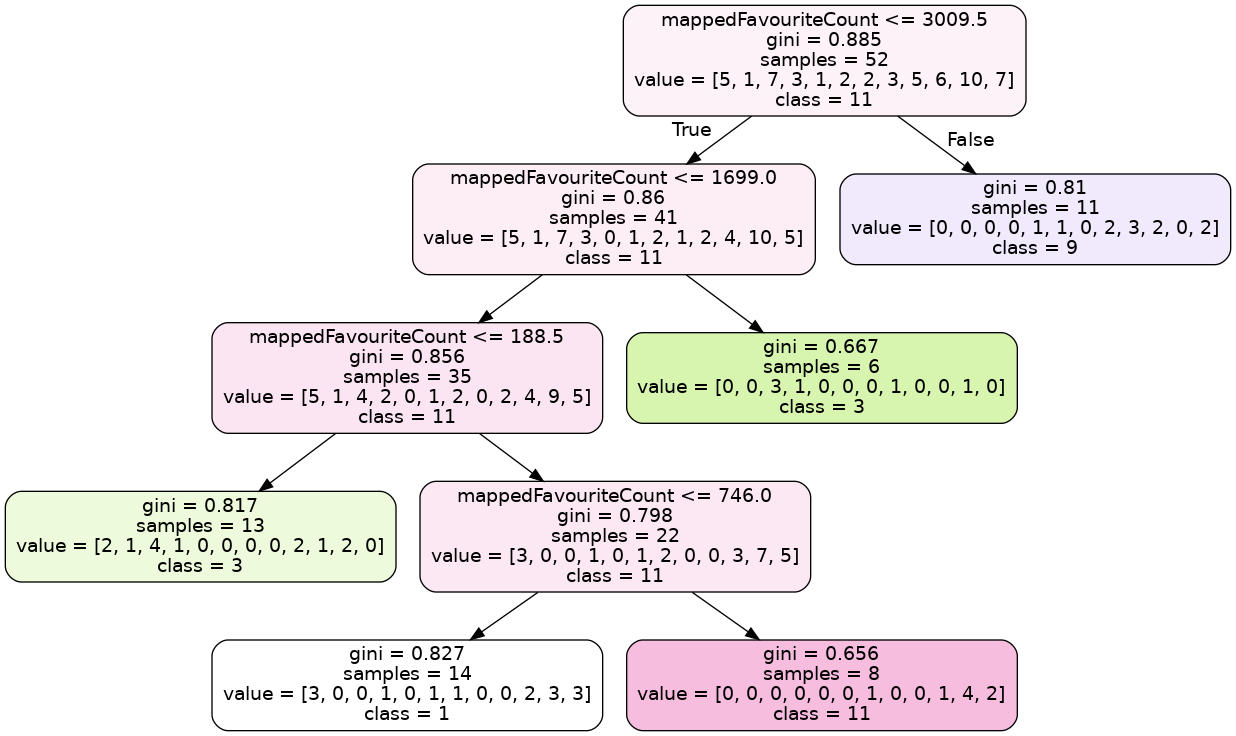

In [12]:
# Crear arrays de entrenamiento y las etiquetas que indican si llegó a top o no 
y_train = users_encoded['mappedAge']
x_train = users_encoded.drop(['mappedAge'], axis=1).values 
 
# Crear Arbol de decision con profundidad = 4
decision_tree = tree.DecisionTreeClassifier(criterion='gini',
                                            min_samples_split=20,
                                            min_samples_leaf=6,
                                            max_depth = 7,
                                            class_weight={0:1})
decision_tree.fit(x_train, y_train)
 
# exportar el modelo a archivo .dot
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(decision_tree,
                              out_file=f,
                              max_depth = 10,
                              impurity = True,
                              feature_names = list(users_encoded.drop(['mappedAge'], axis=1)),
                              class_names = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20'],
                              #class_names = ['Si Bot', 'No Bot'],                             
                              rounded = True,
                              filled= True )
        
        
# Convertir el archivo .dot a png para poder visualizarlo

check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")